In [117]:
import pandas as pd #importing libraries
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import TheilSenRegressor

In [118]:
sea_level = pd.read_csv('sea_level_changes.csv')

In [119]:
sea_level

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,2023,NaN,NaN,NaN,10.203904
1,2022,NaN,NaN,NaN,9.974711
2,2021,NaN,NaN,NaN,9.886688
3,2020,NaN,NaN,NaN,9.699874
4,2019,NaN,NaN,NaN,9.594329
...,...,...,...,...,...
139,1884,0.590551,-0.283465,1.464567,NaN
140,1883,-0.232283,-1.129921,0.665354,NaN
141,1882,-0.440945,-1.346457,0.464567,NaN
142,1881,0.220472,-0.732283,1.173228,NaN


In [120]:
sea_level = sea_level.drop(columns=['Lower Error Bound', 'Upper Error Bound'])
sea_level = sea_level.rename(columns={'CSIRO Adjusted Sea Level' : 'CSIRO', 'NOAA Adjusted Sea Level' : 'NOAA'})

In [121]:
sea_level

,Year,CSIRO,NOAA
0,2023,NaN,10.203904
1,2022,NaN,9.974711
2,2021,NaN,9.886688
3,2020,NaN,9.699874
4,2019,NaN,9.594329
...,...,...,...
139,1884,0.590551,NaN
140,1883,-0.232283,NaN
141,1882,-0.440945,NaN
142,1881,0.220472,NaN


In [122]:
# Function to add all the sea level values into one column; 
# For the years where both CSIRO and NOAA have values, NOAA will supersede 

def adding_sea_level(row):
    return row['CSIRO'] if row['Year'] < 1993 else row['NOAA']

In [123]:
sea_level['SL_Change'] = sea_level.apply(adding_sea_level, axis = 1)

In [124]:
sea_level

,Year,CSIRO,NOAA,SL_Change
0,2023,NaN,10.203904,10.203904
1,2022,NaN,9.974711,9.974711
2,2021,NaN,9.886688,9.886688
3,2020,NaN,9.699874,9.699874
4,2019,NaN,9.594329,9.594329
...,...,...,...,...
139,1884,0.590551,NaN,0.590551
140,1883,-0.232283,NaN,-0.232283
141,1882,-0.440945,NaN,-0.440945
142,1881,0.220472,NaN,0.220472


In [125]:
sea_level['SL_Change'].isnull().sum()

0

In [126]:
def split_by_year(sea_level, Year, split_year):

    # Split based on the year
    before_split = sea_level.loc[sea_level["Year"] < split_year, "SL_Change"].values
    after_split = sea_level.loc[sea_level["Year"] >= split_year, "SL_Change"].values


    return before_split, after_split


In [127]:
older, after = split_by_year(sea_level, 'Year', 1951)

In [128]:
older

array([ 3.59842519,  3.51181102,  3.56299212,  3.37401574,  3.2519685 ,
        2.95669291,  2.84645669,  3.09842519,  3.09842519,  3.09842519,
        2.61811023,  2.82677165,  2.62204724,  2.51968504,  2.29527559,
        2.4488189 ,  2.22834645,  2.44094488,  2.27165354,  2.04724409,
        2.06299212,  1.90551181,  1.8503937 ,  2.00393701,  2.04724409,
        1.79133858,  1.71259842,  2.        ,  1.9527559 ,  1.98818897,
        1.90551181,  1.85433071,  1.79133858,  1.85433071,  2.03149606,
        2.10629921,  1.79527559,  1.54724409,  1.47637795,  1.59842519,
        1.27165354,  1.27559055,  1.0984252 ,  1.19685039,  1.2519685 ,
        0.98425197,  1.2007874 ,  1.60629921,  1.29133858,  1.11023622,
        1.12598425,  1.33858268,  1.04330709,  0.67322835,  0.46850394,
        0.76771654,  0.30314961,  0.68503937,  0.5       ,  0.37401575,
        0.44094488,  0.36220472,  0.2992126 ,  0.21653543,  0.43700787,
        0.53149606,  0.59055118, -0.23228346, -0.44094488,  0.22

In [129]:
after

array([10.20390442,  9.97471076,  9.88668755,  9.69987406,  9.59432944,
        9.34009169,  9.2428458 ,  9.19360137,  9.06110547,  8.71731446,
        8.58619679,  8.49276128,  8.09682093,  8.16437186,  8.1040271 ,
        7.96070603,  7.80360055,  7.80395324,  7.71629221,  7.57314725,
        7.50147539,  7.37478548,  7.30227455,  7.09351197,  6.93305703,
        6.96240961,  6.99860547,  6.84535198,  6.70643301,  6.48547118,
        6.30880342,  6.37401574,  6.34645669,  6.24803149,  6.15748031,
        5.98031495,  5.79527558,  5.77165354,  5.74803149,  6.1535433 ,
        6.18897637,  5.85826771,  6.08661417,  5.59842519,  5.36220472,
        5.55511811,  5.3031496 ,  5.37007873,  5.40944881,  5.47244094,
        5.003937  ,  5.24015748,  4.88188976,  4.67716535,  4.7519685 ,
        4.48425196,  4.4527559 ,  4.39763779,  4.61023622,  4.16929133,
        4.48031496,  4.54330708,  4.74803149,  4.503937  ,  4.35826771,
        4.34645669,  4.29133858,  3.76377952,  3.96456693,  3.92

In [130]:
print(np.var(older), np.var(after))

0.972713972173885 3.1800517453286


In [131]:
stats.ttest_ind(a=older, b=after, equal_var=True)

TtestResult(statistic=-19.453211883884155, pvalue=6.982227098626769e-42, df=142.0)

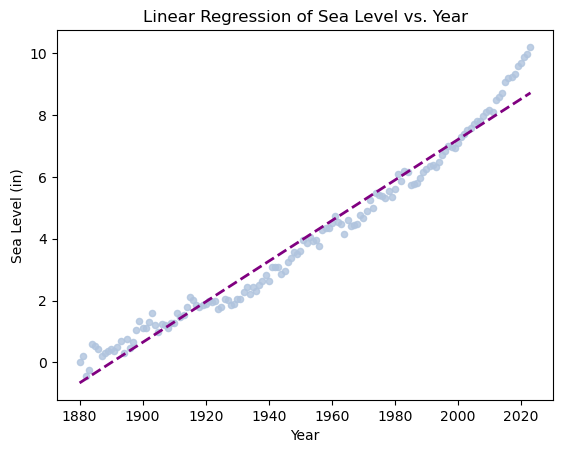

In [132]:
# Create a linear regression plot
sns.regplot(x="Year", y="SL_Change", data=sea_level, ci=None, 
            scatter_kws={"color": "lightsteelblue", "s": 20, "alpha": 0.8}, 
            line_kws={"color": "purple", "linewidth": 2, "linestyle": "--"},)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Sea Level (in)")
plt.title("Linear Regression of Sea Level vs. Year")

# Show plot
plt.show()

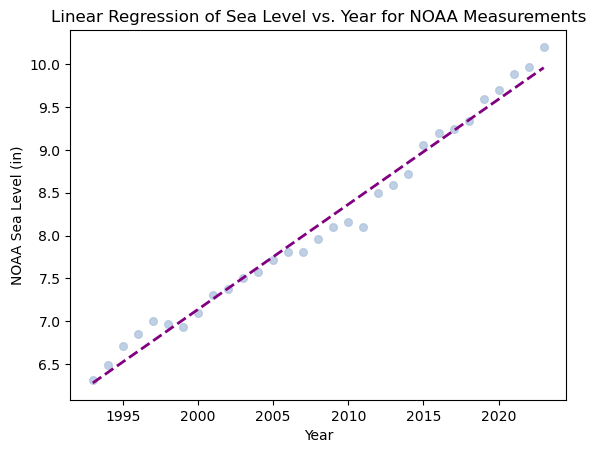

In [133]:
# Create a linear regression plot just for NOAA data
sns.regplot(x="Year", y="NOAA", data=sea_level, ci=None, 
            scatter_kws={"color": "lightsteelblue", "s": 30, "alpha": 0.8}, 
            line_kws={"color": "purple", "linewidth": 2, "linestyle": "--"},)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("NOAA Sea Level (in)")
plt.title("Linear Regression of Sea Level vs. Year for NOAA Measurements")

# Show plot
plt.show()

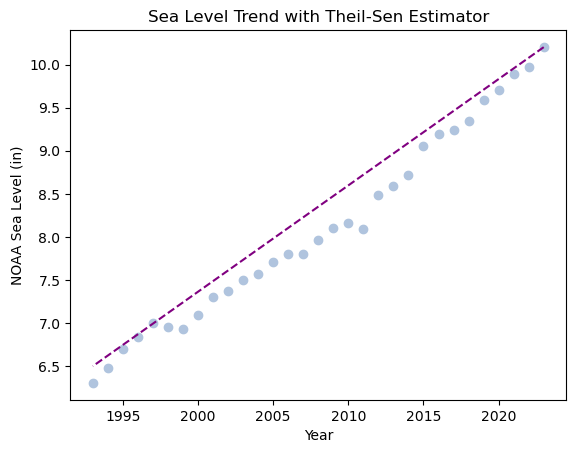

Theil-Sen Slope: 0.1232794967777565


In [134]:
# Drop rows where 'NOAA' or 'Year' is NaN just for this plot
sea_level_clean = sea_level.dropna(subset=['Year', 'NOAA'])

# Now extract the clean data
X = sea_level_clean['Year'].values.reshape(-1, 1)
Y = sea_level_clean['NOAA'].values

model = TheilSenRegressor()
model.fit(X, Y)

plt.scatter(sea_level_clean['Year'], sea_level_clean['NOAA'], color='lightsteelblue')
plt.plot(sea_level_clean['Year'], model.predict(X), color='purple', linestyle='--')
plt.xlabel('Year')
plt.ylabel('NOAA Sea Level (in)')
plt.title('Sea Level Trend with Theil-Sen Estimator')
plt.show()

print(f"Theil-Sen Slope: {model.coef_[0]}")


In [135]:
sea_level.to_csv('Sea_Level_Agg.csv', index=False)